In [2]:
# %pip install numpy
# %pip install pandas
# %pip install -U scikit-learn
# %pip install matplotlib
# %pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
emg = pd.read_excel(base_dir + "\_data\EMGRecordings.xlsx", header = None)
distance_data = pd.read_excel(base_dir + "\_data\DistanceRecordings.xlsx", header = None)
vel_data = pd.read_excel(base_dir + "\_data\VelocityRecordings.xlsx", header = None)
accel_data = pd.read_excel(base_dir + "\_data\AccelerationRecordings.xlsx", header = None)

In [5]:
# data_emg = pd.read_excel('wavedata_EMG_unfiltered 1.xlsx', header = None)
# data_eeg = pd.read_excel('wavedata_EEG_unfiltered 1.xlsx', header = None)
# X = data_eeg.values
# y = data_emg.values
print(distance_data.shape)
print(vel_data.shape)
print(accel_data.shape)
print(emg.shape)
X = pd.concat([vel_data, accel_data, distance_data], axis=1).values
print(X)
nan_in_X = np.isnan(X)
X = np.where(nan_in_X == True, 0, X)
print(X[:-1])
new_nan = np.isnan(X)
# print(new_nan)
y = emg.values
nan_in_Y = np.isnan(y)
# print(nan_in_Y)
y = np.where(nan_in_Y == True, 0, y)
# print(X.shape)
# print(new_y)
new_nan_y = np.isnan(y)
# print(new_nan_y)
print(y.shape)
print(X.shape)
#Prepare/Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

# Scale data:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# create and configure MLPRegressor
## Possibly we could use (50, 25, 5) since each is a learning block for the hidden layers
#mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam',
#                     alpha=0.0001, batch_size='auto', learning_rate='adaptive',
#                     learning_rate_init=0.001, max_iter=500, random_state=1)

# #fit the model
# mlp.fit(X_train, y_train)

# # Predict using the test data
# y_pred = mlp.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")

(782, 1399)
(782, 1399)
(782, 1399)
(782, 1399)
[[ 0.16753311  0.1703941   0.17535906 ... -1.83495393 -1.82478108
  -1.81393087]
 [ 0.13106429  0.13455754  0.13793825 ... -2.27276708 -2.27368499
  -2.27481619]
 [-0.03107729 -0.02881623 -0.02689105 ... -1.29919453 -1.3000906
  -1.30115676]
 ...
 [ 0.01413574  0.02032067  0.02671232 ... -1.24936911 -1.24567474
  -1.24222703]
 [-0.476828   -0.47398484 -0.47115587 ... -5.7434966  -5.73968171
  -5.73629735]
 [ 0.0398571   0.03765334  0.03590568 ...  0.43809812  0.43992131
   0.44183435]]
[[ 0.16753311  0.1703941   0.17535906 ... -1.83495393 -1.82478108
  -1.81393087]
 [ 0.13106429  0.13455754  0.13793825 ... -2.27276708 -2.27368499
  -2.27481619]
 [-0.03107729 -0.02881623 -0.02689105 ... -1.29919453 -1.3000906
  -1.30115676]
 ...
 [-0.2116915  -0.21556953 -0.21929931 ... -0.570465   -0.56887886
  -0.56735724]
 [ 0.01413574  0.02032067  0.02671232 ... -1.24936911 -1.24567474
  -1.24222703]
 [-0.476828   -0.47398484 -0.47115587 ... -5.7434966

In [6]:
model = Sequential()
model.add(Dense(50, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "linear"))
model.compile(optimizer = Adam(), loss = "mse", metrics =["mae"])
history = model.fit(X_train, y_train, epochs = 200, validation_split=0.3)
loss, mae = model.evaluate(X_test, y_test)

Epoch 1/200
12/12 [==============================] - 1s 31ms/step - loss: 283.6952 - mae: 12.4335 - val_loss: 95.0284 - val_mae: 9.4060
Epoch 2/200
12/12 [==============================] - 0s 10ms/step - loss: 44.7499 - mae: 4.6689 - val_loss: 3.7875 - val_mae: 1.5930
Epoch 3/200
12/12 [==============================] - 0s 12ms/step - loss: 10.4560 - mae: 1.9089 - val_loss: 3.1764 - val_mae: 1.1383
Epoch 4/200
12/12 [==============================] - 0s 16ms/step - loss: 5.1459 - mae: 1.1831 - val_loss: 3.6132 - val_mae: 1.1644
Epoch 5/200
12/12 [==============================] - 0s 10ms/step - loss: 5.2618 - mae: 0.8576 - val_loss: 1.1923 - val_mae: 0.4453
Epoch 6/200
12/12 [==============================] - 0s 11ms/step - loss: 2.5239 - mae: 0.5571 - val_loss: 0.6585 - val_mae: 0.5678
Epoch 7/200
12/12 [==============================] - 0s 11ms/step - loss: 1.0564 - mae: 0.4400 - val_loss: 0.5933 - val_mae: 0.3638
Epoch 8/200
12/12 [==============================] - 0s 10ms/step - lo

In [15]:
print("Overall Loss = ", loss)
print("Overall MAE = ", mae)
ypred1 = model.predict(X_test)
print(ypred1.shape)
print(y_test.shape)
# y_test_flat = y_test.flatten()
# y_pred_flat = ypred1.flatten()
# r2_v1 = r2_score(y_test_flat, y_pred_flat)
# print("R2 = ", r2_v1)
# mse_v1 = mean_squared_error(y_test_flat, y_pred_flat)
# print("MSE = ", mse_v1)

Overall Loss =  0.27053797245025635
Overall MAE =  0.31772997975349426
8/8 [==============================] - 0s 18ms/step
(235, 1)
(235, 1399)


In [8]:
# from sklearn.model_selection import cross_val_score
# import matplotlib.pyplot as plt

# min_value = np.min(y_test)
# max_value = np.max(y_test)

# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.title('True Values vs Predictions')
# plt.plot([min_value, max_value], [min_value, max_value], 'k--', lw=2)
# plt.show()


# train_scores = []
# test_scores = []

# for m in range(1, 11):
#     mlp = MLPRegressor(hidden_layer_sizes=(m*10,), activation='relu', solver='adam',
#                         alpha=0.0001, batch_size='auto', learning_rate='adaptive',
#                         learning_rate_init=0.001, max_iter=200, random_state=1)
#     mlp.fit(X_train, y_train)

#     train_scores.append(mlp.score(X_train, y_train))
#     test_scores.append(mlp.score(X_test, y_test))

# plt.plot(range(1, 11), train_scores, label='Training score')
# plt.plot(range(1, 11), test_scores, label='Test score')
# plt.xlabel('Number of Neurons in Hidden Layer')
# plt.ylabel('Score')
# plt.title('Learning Curves')
# plt.legend()
# plt.show()


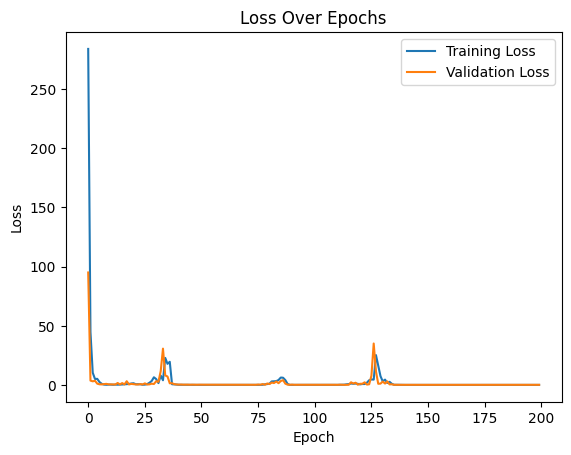

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

In [10]:
attempt2 = Sequential()
attempt2.add(Dense(50, activation = "relu", input_dim = X_train.shape[1]))
attempt2.add(Dense(25, activation = "relu"))
attempt2.add(Dense(1, activation = "linear"))
attempt2.compile(optimizer = Adam(), loss = "mse", metrics =["mae"])
history2 = model.fit(X_train, y_train, epochs = 200, validation_split=0.3)
loss2, mae2 = model.evaluate(X_test, y_test)

Epoch 1/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1379 - mae: 0.2665 - val_loss: 0.2159 - val_mae: 0.2755
Epoch 2/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1392 - mae: 0.2601 - val_loss: 0.2346 - val_mae: 0.3476
Epoch 3/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1404 - mae: 0.2689 - val_loss: 0.2176 - val_mae: 0.3014
Epoch 4/200
12/12 [==============================] - 0s 11ms/step - loss: 0.1369 - mae: 0.2622 - val_loss: 0.2258 - val_mae: 0.3236
Epoch 5/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1401 - mae: 0.2669 - val_loss: 0.2281 - val_mae: 0.2641
Epoch 6/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1420 - mae: 0.2652 - val_loss: 0.2313 - val_mae: 0.3371
Epoch 7/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1523 - mae: 0.2751 - val_loss: 0.2231 - val_mae: 0.2725
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 0.1

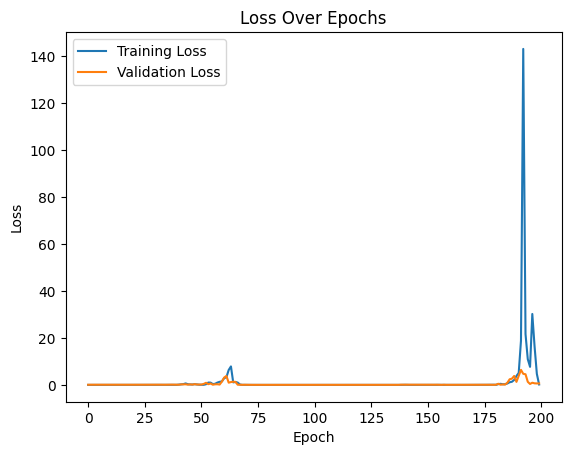

In [11]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

In [12]:
X_2 = np.stack([vel_data.values, accel_data.values, distance_data.values], axis = 2)
# print(X_2.shape)
# print(X_2)
y_2 = emg.values[:, :, np.newaxis]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

model3 = Sequential()
model3.add(SimpleRNN(50, activation = "relu", return_sequences=True, input_shape = (X_train2.shape[1], X_train2.shape[2])))
model3.add((Dense(1)))

optimizer = Adam(learning_rate = 0.005)
model3.compile(optimizer = optimizer, loss = "mse", metrics = ["mae"])

history3 = model3.fit(X_train2, y_train2, epochs = 200, validation_split=0.3)

y_pred2 = model3.predict(X_test2)
print(y_pred2.shape)

Epoch 1/200
12/12 [==============================] - 7s 453ms/step - loss: 1.2964 - mae: 0.7084 - val_loss: 0.1433 - val_mae: 0.2520
Epoch 2/200
12/12 [==============================] - 4s 313ms/step - loss: 0.2041 - mae: 0.2882 - val_loss: 0.1345 - val_mae: 0.2223
Epoch 3/200
12/12 [==============================] - 4s 332ms/step - loss: 0.1313 - mae: 0.2456 - val_loss: 0.1128 - val_mae: 0.2234
Epoch 4/200
12/12 [==============================] - 6s 528ms/step - loss: 0.1129 - mae: 0.2238 - val_loss: 0.1027 - val_mae: 0.2107
Epoch 5/200
12/12 [==============================] - 4s 340ms/step - loss: 0.1072 - mae: 0.2187 - val_loss: 0.1006 - val_mae: 0.2111
Epoch 6/200
12/12 [==============================] - 4s 329ms/step - loss: 0.1050 - mae: 0.2132 - val_loss: 0.0995 - val_mae: 0.2143
Epoch 7/200
12/12 [==============================] - 6s 511ms/step - loss: 0.1034 - mae: 0.2125 - val_loss: 0.0990 - val_mae: 0.2112
Epoch 8/200
12/12 [==============================] - 4s 337ms/step - 

In [13]:
print("Overall Loss = ", loss)
print("Overall MAE = ", mae)
y_pred2_flat = y_pred2.flatten()
y_test2_flat = y_test2.flatten()
r2 = r2_score(y_test2_flat, y_pred2_flat)
print("R2 Score = ", r2)
mse = mean_squared_error(y_test2_flat, y_pred2_flat)
print("MSE = ", mse)

Overall Loss =  0.27053797245025635
Overall MAE =  0.31772997975349426
R2 Score =  0.31822527163288006
MSE =  0.09304099208365493


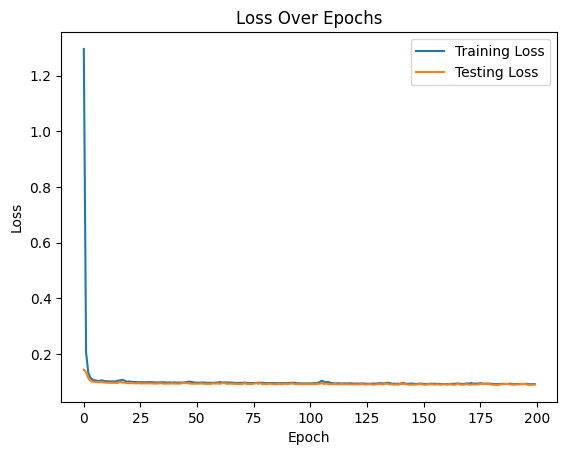

In [14]:
fig2 = plt.figure()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs - Recurrent Neural Network')
plt.legend()
# fig2.savefig(base_dir + "/_images/RecurrentLoss.jpg")

In [ ]:
# plt.scatter(y_test2_flat, y_pred2_flat, alpha=0.3)
# plt.plot([y_test2_flat.min(), y_test2_flat.max()], [y_test2_flat.min(), y_test2_flat.max()], '--r', linewidth=2)
# plt.xlabel('True Values')
# plt.ylabel('Predicted Values')
# plt.title('True vs Predicted Values')
# plt.show()